Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [8]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [9]:
import glob
import os
import csv

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv")) # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
df_concatenated = pd.read_csv(all_files[0])  # start with first subject
for i, file in enumerate(all_files):  # concatenate data of remaining subjects into one data frame
    if i > 0:
        df = pd.read_csv(file)
        df_concatenated = pd.concat((df_concatenated, df), axis=0, ignore_index=True)

# use pd.set_option here to display in a nice way
pd.set_option('display.max_rows', 20)  # limit the output to 20 rows
print(df_concatenated)

# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
with open(DATAPATH, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['SubjectID', 'StimulusType', 'response', 'RT'])
    writer.writerows(df_concatenated.get_values())

     SubjectID  StimulusType  response   RT
0        30001             1         1  427
1        30001             1         1  289
2        30001             1         1  267
3        30001             1         1  408
4        30001             1         1  388
5        30001             1         1  369
6        30001             0         0    0
7        30001             0         0    0
8        30001             1         1  420
9        30001             1         1  389
..         ...           ...       ...  ...
790      30008             1         1  425
791      30008             1         1  371
792      30008             1         1  391
793      30008             1         1  388
794      30008             1         1  372
795      30008             1         1  409
796      30008             0         0    0
797      30008             0         1  321
798      30008             1         1  473
799      30008             1         1  544

[800 rows x 4 columns]


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [10]:
# add a column "congruence"
df_concatenated['congruence'] = (df_concatenated['StimulusType'] == df_concatenated['response'])

# create a new dataframe with averaged data
df_concatenated_avg = pd.DataFrame()  # create an empty data frame
# accuracy: averaged congruence
df_concatenated_avg['accuracy'] = df_concatenated.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
# averaged response time
df_concatenated_avg['RT'] = (df_concatenated[df_concatenated['RT']!=0].groupby(['SubjectID', 'StimulusType'])['RT'].mean())

print(df_concatenated_avg)  

# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH, index=True)


                        accuracy          RT
SubjectID StimulusType                      
30001     0               0.8500  299.666667
          1               1.0000  350.612500
30002     0               0.9000  246.500000
          1               1.0000  344.212500
30003     0               1.0000         NaN
          1               1.0000  425.600000
30004     0               0.6500  358.571429
          1               1.0000  319.075000
30005     0               0.9500  289.000000
          1               0.9625  307.181818
30006     0               0.8000  282.500000
          1               1.0000  385.575000
30007     0               0.9000  336.500000
          1               1.0000  355.475000
30008     0               0.8500  270.333333
          1               1.0000  393.175000


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

In [11]:
sns.set(context = "talk", style="white", font_scale=1, rc={'figure.figsize':(8,6)})

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


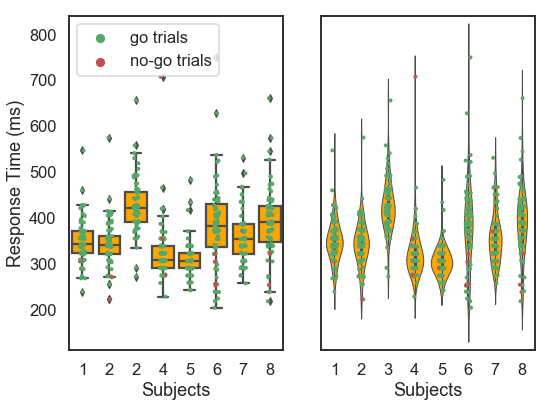

In [12]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")
data_concat = data_concat[data_concat['RT'] != 0]  # remove data with RT=0
data_concat['StimulusType'] = data_concat['StimulusType'].map({0: 'no-go trials', 1: 'go trials'})  # rename values for StimulusType

#print(data_concat)

# create two subplots
fig, axes = plt.subplots(nrows=1,ncols=2)

# first subplot with stripplot and boxplot
# boxplot
sns.boxplot(data=data_concat, x='SubjectID', y='RT', color='orange', saturation=1, ax=axes[0])
# stripplot
strip_boxplot = sns.stripplot(data=data_concat, x='SubjectID', y='RT', hue='StimulusType', palette=['g','r'], size=4, jitter=True, ax=axes[0])
# customize first subplot
strip_boxplot.set(xticklabels=['1','2','2','4','5','6','7','8'], xlabel='Subjects', ylabel='Response Time (ms)', ylim=[110,840])

# second subplot with stripplot and violinplot
# violinplot
sns.violinplot(data=data_concat, x='SubjectID', y='RT', color='orange', saturation=1, linewidth=1, ax=axes[1])
# stripplot
strip_violinplot = sns.stripplot(data=data_concat, x='SubjectID', y='RT', hue='StimulusType', palette=['g','r'], size=4, jitter=True, ax=axes[1])
# customize second subplot
strip_violinplot.set(xticklabels=['1','2','3','4','5','6','7','8'], xlabel='Subjects', ylabel='', ylim=[110,840], yticklabels=[])

# specify legend position and remove second legend
strip_boxplot.legend(loc=2)
strip_violinplot.legend_.remove()

fig.tight_layout()
fig.show()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


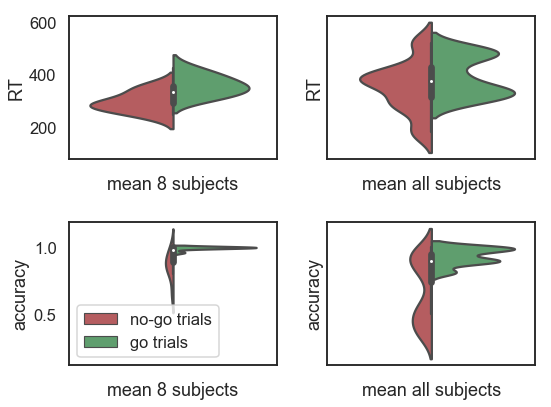

In [13]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
PATH = os.getcwd()+ "/Experimental_Data"
df_all_groups = pd.DataFrame()
for group_number in range(1,12):  # iterate over all 11 groups
    path_group = PATH + '/Group_' + str(i)
    all_files = glob.glob(os.path.join(path_group, "*.csv"))  # data of one group
    df_group = pd.DataFrame()
    for subject_number, file in enumerate(all_files):  # iterate over subjects of one group
        df_subject = pd.read_csv(file)
        df_subject['SubjectID'] = str(group_number) + '00' + str(subject_number + 1)  # reformat subject ID
        df_group = pd.concat((df_group, df_subject), axis=0, ignore_index=True)
    df_all_groups = pd.concat((df_all_groups, df_group), axis=0, ignore_index=True)

# add a column "congruence" to df_all_groups
df_all_groups['congruence'] = (df_all_groups['StimulusType'] == df_all_groups['response'])

#print(df_all_groups)

# averaged data frame
df_all_groups_avg = pd.DataFrame()
# accuracy: averaged congruence
df_all_groups_avg['accuracy'] = df_all_groups.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
# averaged response time
df_all_groups_avg['RT'] = df_all_groups[df_all_groups['RT'] != 0].groupby(['SubjectID', 'StimulusType'])['RT'].mean()

# reorganize averaged data frame
df_all_groups_avg = df_all_groups_avg.reset_index()
df_all_groups_avg = df_all_groups_avg.set_index('SubjectID')
df_all_groups_avg['mean all subjects'] = ''  # create empty column in order to split single violin plot
# rename values for StimulusType
df_all_groups_avg['StimulusType'] = df_all_groups_avg['StimulusType'].map({0: 'no-go trials', 1: 'go trials'})

#print(df_all_groups_avg)  

# read in data from group 3
data_group3 = pd.read_csv(os.getcwd() + '/Processed/data_concatenated_averaged_moritz.csv')
data_group3['mean 8 subjects'] = ''  # create empty column in order to split single violin plot
# rename values for StimulusType
data_group3['StimulusType'] = data_group3['StimulusType'].map({0: 'no-go trials', 1: 'go trials'})

#print(data_group3)

# Plotting data
figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for data of group 3
violin_8_rt = sns.violinplot(data=data_group3, y='RT', x='mean 8 subjects', hue='StimulusType', palette=['r','g'], split=True, ax=axes[0,0])
violin_8_acc = sns.violinplot(data=data_group3, y='accuracy', x='mean 8 subjects', hue='StimulusType', palette=['r','g'], split=True, ax=axes[1,0])

# violin plot of all group's data
violin_all_rt = sns.violinplot(data=df_all_groups_avg, y='RT', x='mean all subjects', hue='StimulusType', palette=['r', 'g'], split=True, ax=axes[0,1])
violin_all_acc = sns.violinplot(data=df_all_groups_avg, y='accuracy', x='mean all subjects', hue='StimulusType', palette=['r','g'], split=True, ax=axes[1,1])

# specify legend position and remove superflous legends
violin_8_acc.legend(loc=3)
violin_8_rt.legend_.remove()
violin_all_rt.legend_.remove()
violin_all_acc.legend_.remove()

figs.tight_layout()
figs.show()

Compare two datasets and relate it with CLT. Write your opinion here.

According to the Central Limit Theorem, we would expect the distribution of response time and accuracy for all subjects to approach a normal distribution. However, in our case, the distributions of resposne time and accuracy for 8 subjects look alomost normally distributed, whereas the distributions for all subjects are far less normal, some are even bimodal.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

/Applications/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


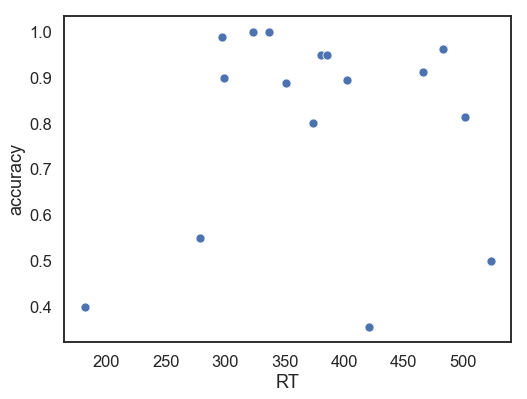

In [14]:
#print(df_all_groups_avg)
fig, axes = plt.subplots(nrows=1, ncols=1)
scatter = sns.scatterplot(x=df_all_groups_avg['RT'], y=df_all_groups_avg['accuracy'], ax=axes)
fig.show()

Looking at the plot above, it does not seem like there is a significant positive correlation between response time and accuracy. Linear regression is necessary to proof that intuition.